In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/ml_projects/ml_optimisation/"

Mounted at /content/gdrive


In [0]:
# enables inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# imports the required packages
from fastai.collab import *
from fastai.tabular import *
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
# defines the data directory
data_dir = Path(root_dir + '/data/')
data_dir

PosixPath('/content/gdrive/My Drive/ml_projects/ml_optimisation/data')

In [157]:
# reads in the papers with code model data
model_data = pd.read_csv(data_dir/'pw_code_model_data.csv')

model_data.head()

,dataset,extradata,global_rank,metric_name,metric_value,model,remove,task,paper,paper_path,paper_url
0,IC15,NaN,# 10,F-Measure,75.61%,SegLink,-,Scene Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...,NaN
1,SCUT-CTW1500,NaN,# 5,F-Measure,40.8%,SegLink,-,Curved Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...,NaN
2,SNLI,NaN,# 36,% Test Accuracy,84.6,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN
3,SNLI,NaN,# 44,% Train Accuracy,86.2,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN
4,SNLI,NaN,# 1,Parameters,3.0m,300D NSE encoders,-,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders,NaN


In [158]:
len(model_data)

5503

In [159]:
# lists the columns in the model_data dataframe
model_data.columns

Index(['dataset', 'extradata', 'global_rank', 'metric_name', 'metric_value',
       'model', 'remove', 'task', 'paper', 'paper_path', 'paper_url'],
      dtype='object')

## Data preprocessing

In [160]:
# remove all columns with NaN's
 model_data = model_data.dropna(axis=1, how='all')
  
 # drops the remove column
 model_data = model_data.drop('remove', 1)

# remove the hash from the global_rank column
model_data['global_rank'] = model_data['global_rank'].str.replace('#','')

# converts the global_rank column values to integers
model_data['global_rank'] = pd.to_numeric(model_data['global_rank'])

# remove rows where the metric_value is NaN
model_data = model_data.dropna(subset = ['metric_value'])

#
model_data = model_data[~model_data.metric_value.str.contains('-')]


len(model_data)

# model_data.head()

5425

In [161]:
# extracts the integer from the metric_value column
model_data['metric_value'] = model_data['metric_value'].str.extract('(\d+)').astype(int)

model_data.head()

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
0,IC15,10,F-Measure,75,SegLink,Scene Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...
1,SCUT-CTW1500,5,F-Measure,40,SegLink,Curved Text Detection,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...
2,SNLI,36,% Test Accuracy,84,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders
3,SNLI,44,% Train Accuracy,86,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders
4,SNLI,1,Parameters,3,300D NSE encoders,Natural Language Inference,Neural Semantic Encoders,/paper/neural-semantic-encoders


## Generating training & test data

In [162]:
# generates training and test dataframes
train_df, test_df = train_test_split(model_data, test_size = 0.2)

train_df.head()

BORKNENENENNE

,dataset,global_rank,metric_name,metric_value,model,task,paper,paper_path
1487,Atari 2600 James Bond,10,Score,768,DQN noop,Atari Games,Deep Reinforcement Learning with Double Q-lear...,/paper/deep-reinforcement-learning-with-double-q
1918,Set14 - 4x upscaling,7,SSIM,0,EDSR,Image Super-Resolution,Enhanced Deep Residual Networks for Single Ima...,/paper/enhanced-deep-residual-networks-for-single
4158,Atari 2600 Asteroids,17,Score,1032,Bootstrapped DQN,Atari Games,Deep Exploration via Bootstrapped DQN,/paper/deep-exploration-via-bootstrapped-dqn
653,Penn Treebank,9,Accuracy,97,Feed Forward,Part-Of-Speech Tagging,Supertagging With LSTMs,/paper/supertagging-with-lstms
349,Atari 2600 Centipede,21,Score,3306,A3C FF (1 day) hs,Atari Games,Asynchronous Methods for Deep Reinforcement Le...,/paper/asynchronous-methods-for-deep-reinforce...


In [163]:
# 20% train vs test split
len(train_df), len(test_df)

(4340, 1085)

In [0]:
# 
procs = [FillMissing, Categorify, Normalize]

In [0]:
# initialises an empty categorical vars
cat_vars = ['dataset', 'metric_name', 'task', 'model', 'paper', 'paper_path']

# initialises an empty continuous vars
cont_vars = ['global_rank', 'metric_value']

In [175]:
# dependent variable
dep_var = 'model'

# final dataframe
# df_train = train_df[cat_vars + cont_vars + [dep_var]].copy()
df_train = model_data[cat_vars + cont_vars + [dep_var]].copy()



# 
df_test = test_df[cat_vars + cont_vars].copy()

df_train.head()

,dataset,metric_name,task,model,paper,paper_path,global_rank,metric_value,model
0,IC15,F-Measure,Scene Text Detection,SegLink,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...,10,75,SegLink
1,SCUT-CTW1500,F-Measure,Curved Text Detection,SegLink,Detecting Oriented Text in Natural Images by L...,/paper/detecting-oriented-text-in-natural-imag...,5,40,SegLink
2,SNLI,% Test Accuracy,Natural Language Inference,300D NSE encoders,Neural Semantic Encoders,/paper/neural-semantic-encoders,36,84,300D NSE encoders
3,SNLI,% Train Accuracy,Natural Language Inference,300D NSE encoders,Neural Semantic Encoders,/paper/neural-semantic-encoders,44,86,300D NSE encoders
4,SNLI,Parameters,Natural Language Inference,300D NSE encoders,Neural Semantic Encoders,/paper/neural-semantic-encoders,1,3,300D NSE encoders


In [167]:
df_test.head()

,dataset,metric_name,task,model,paper,paper_path,global_rank,metric_value
2650,WikiQA,MAP,Question Answering,Paragraph vector (lexical overlap + dist output),Distributed Representations of Sentences and D...,/paper/distributed-representations-of-sentence...,12,0
2552,Penn Treebank (Word Level),Validation perplexity,Language Modelling,Efficient NAS,Efficient Neural Architecture Search via Param...,/paper/efficient-neural-architecture-search-via-1,16,60
4656,WebNLG,BLEU,Data-to-Text Generation,GCN EC,Deep Graph Convolutional Encoders for Structur...,/paper/deep-graph-convolutional-encoders-for,1,0
1545,Atari 2600 Space Invaders,Score,Atari Games,Prior+Duel hs,Deep Reinforcement Learning with Double Q-lear...,/paper/deep-reinforcement-learning-with-double-q,5,8978
2077,Mini-ImageNet - 1-Shot Learning,Accuracy,Few-Shot Image Classification,Cosine similarity function + C64F feature extr...,Dynamic Few-Shot Visual Learning without Forge...,/paper/dynamic-few-shot-visual-learning-without,3,56


In [176]:
model_data.dtypes

dataset         object
global_rank      int64
metric_name     object
metric_value     int64
model           object
task            object
paper           object
paper_path      object
dtype: object

In [177]:
#
valid_idx = range(1000)

valid_idx

range(0, 1000)

In [179]:
# databunch generation
data = (TabularList.from_df(train_df, path = data_dir, cat_names = cat_vars, cont_names = cont_vars, procs = procs)
                .split_by_idx(valid_idx)
                
                
                 # label_cls = FloatList informs fastai that this is a regression problem
                 # log due to RMSE 
                .label_from_df(cols = dep_var)
        
#                 .add_test(TabularList.from_df(df_test, path = data_dir, cat_names = cat_vars, cont_names = cont_vars, procs = procs))
                .databunch(bs=1024))

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
k-NN, OCNet, CNN Seq2Seq + Fluency Boost, FusionNet (single model), Reactor...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [180]:
# displays 5 random rows from the databunch
data.show_batch(rows = 5)

dataset,metric_name,task,model,paper,paper_path,global_rank,metric_value,target
Netflix,[emailÂ protected],Collaborative Filtering,Mult-VAE PR,Variational Autoencoders for Collaborative Filtering,/paper/variational-autoencoders-for-collaborative,-0.5471,-0.1277,Mult-VAE PR
WikiText-2,Validation perplexity,Language Modelling,Past Decode Reg. + AWD-LSTM-MoS + dyn. eval.,Improved Language Modeling by Decoding the Past,/paper/improved-language-modeling-by-decoding-the,-0.4812,-0.1269,Past Decode Reg. + AWD-LSTM-MoS + dyn. eval.
CIFAR-10,NLL Test,Image Generation,GLOW,Glow: Generative Flow with Invertible 1x1 Convolutions,/paper/glow-generative-flow-with-invertible-1x1,-0.2172,-0.1276,GLOW
ContactDB,Error rate,Human Grasp Contact Prediction,DiverseNet-PointNet,ContactDB: Analyzing and Predicting Grasp Contact via Thermal Imaging,/paper/contactdb-analyzing-and-predicting-grasp,-0.4152,-0.1273,DiverseNet-PointNet
Set5 - 4x upscaling,SSIM,Image Super-Resolution,RED30,Image Restoration Using Very Deep Convolutional Encoder-Decoder Networks with Symmetric Skip Connections,/paper/image-restoration-using-very-deep,0.7065,-0.1277,RED30


In [0]:
## 

## Learner generation

In [0]:
#
learn = tabular_learner(data, layers=[200,100],
                        ps=[0.001, 0.01],
                        metrics = accuracy)

In [191]:
# describes the learner
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(544, 54)
    (1): Embedding(203, 31)
    (2): Embedding(203, 31)
    (3): Embedding(1409, 93)
    (4): Embedding(1100, 81)
    (5): Embedding(1104, 81)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=373, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=100, out_features=1408, bias=True)
  )
)

In [192]:
# finds the learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


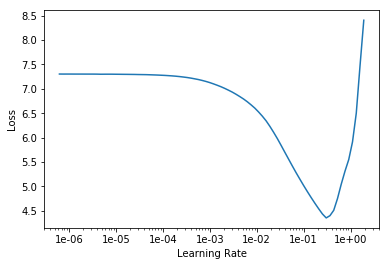

In [193]:
# 
learn.recorder.plot()

In [194]:
learn.fit_one_cycle(10, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,7.226511,7.245714,0.000000,00:00
1,6.895422,7.236292,0.009901,00:00
2,6.463929,7.203156,0.034653,00:00
3,5.973306,7.111131,0.044554,00:00
4,5.428785,6.938474,0.089109,00:00
5,4.872969,6.709543,0.131188,00:00
6,4.356105,6.451805,0.205446,00:00
7,3.900039,6.187103,0.295792,00:00
8,3.516075,5.931649,0.420792,00:00
9,3.200053,5.684103,0.535891,00:00


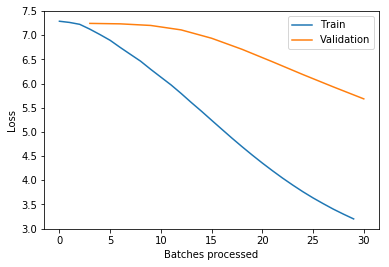

In [195]:
#
learn.recorder.plot_losses()